<a href="https://colab.research.google.com/github/Rakin003/Rakin_Code_Workshop/blob/main/Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/chicken_dataset/Resized_Augmented_Dataset.zip'
extract_to = '/content/chicken_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
data_dir = '/content/chicken_dataset/train(Resized_Augmented)'  # this is your extracted dataset folder
img_size = (224, 224)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4040 images belonging to 10 classes.
Found 1010 images belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - accuracy: 0.4938 - loss: 1.4750 - val_accuracy: 0.9139 - val_loss: 0.3442
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.8999 - loss: 0.3512 - val_accuracy: 0.9436 - val_loss: 0.2077
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - accuracy: 0.9373 - loss: 0.2249 - val_accuracy: 0.9317 - val_loss: 0.1956
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9551 - loss: 0.1551 - val_accuracy: 0.9376 - val_loss: 0.1878
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.9754 - loss: 0.0992 - val_accuracy: 0.9515 - val_loss: 0.1715
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9833 - loss: 0.0709 - val_accuracy: 0.9386 - val_loss: 0.1877
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9824 - loss: 0.0613 - val_accuracy: 0.9168 - val_loss: 0.2412
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - accuracy: 0.9854 - loss: 0

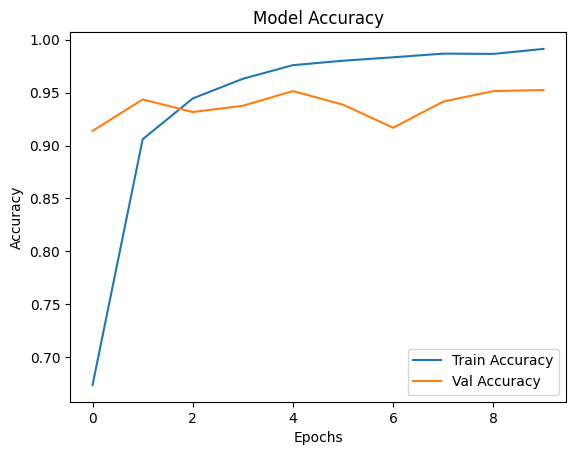

[0.6737623810768127, 0.905940592288971, 0.9445544481277466, 0.9631187915802002, 0.9759901165962219, 0.9801980257034302, 0.9834158420562744, 0.9868811964988708, 0.9866336584091187, 0.9913366436958313]
[0.9138613939285278, 0.9435643553733826, 0.9316831827163696, 0.9376237392425537, 0.9514851570129395, 0.9386138319969177, 0.9168316721916199, 0.9415841698646545, 0.9514851570129395, 0.9524752497673035]


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
print(history.history['accuracy'])
print(history.history['val_accuracy'])

In [ ]:
model.save('/content/chicken_breed_classifier_mobilenetv2.h5')

In [ ]:
!ls "/content/drive/MyDrive/chicken_dataset/"


chicken_breed_classifier_mobilenetv2.h5  Resized_Augmented_Dataset.zip
